# Dataset Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from logistic_regression import LogisticRegression
from adaboost import AdaBoost

### Importing the dataset
Change the path to the dataset to import different datasets below.

In [4]:
dataset = pd.read_csv('../datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# dataset = pd.read_csv('../datasets/creditcard.csv')


### Understanding the dataset

In [5]:
print(f"Shape of dataset: {dataset.shape}")
# print(f"Information of each feature of the dataset: {dataset.info()}")
print(f"number of non number values in numeric features: {dataset.isna().sum()}")

Shape of dataset: (7043, 21)
number of non number values in numeric features: customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


### Understanding the dataset with graphs 
Plot different parameters against each other to understand the dataset.
Change the parameters to plot different graphs. `All parameters might not work as some values may not be numeric.`

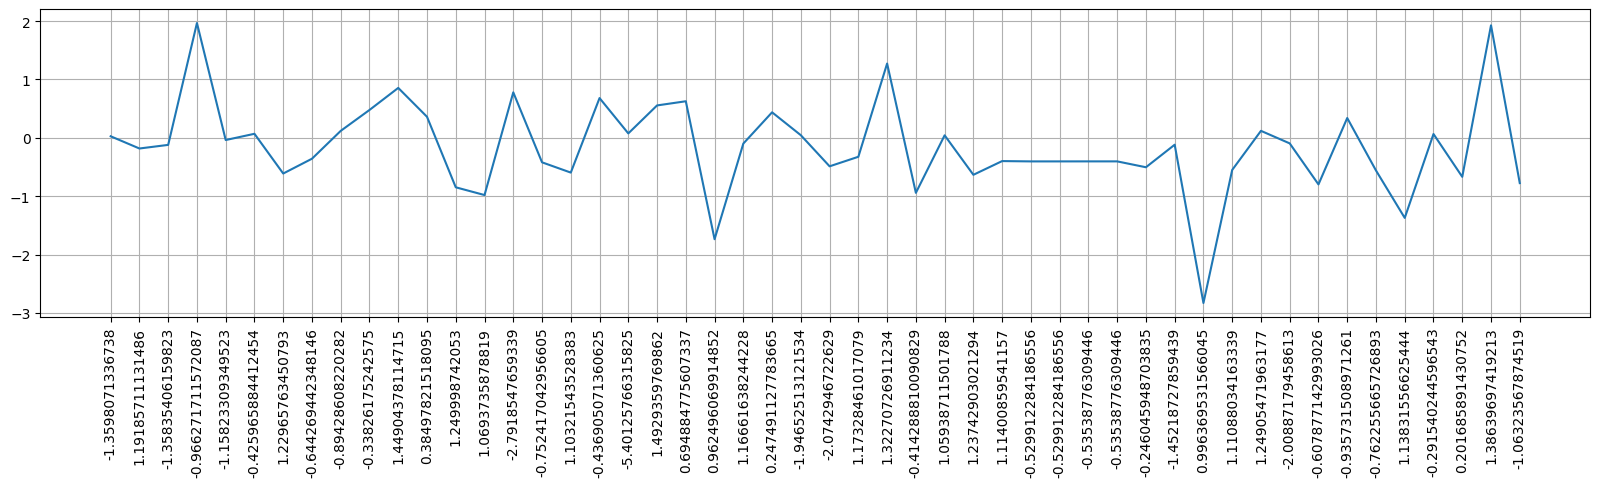

In [4]:
# plot the data
y_test = np.array(dataset.iloc[:50, 18])
x_test = list(range(50))
x_ticks = dataset.iloc[:50, 1]
plt.figure(figsize=(20, 4))
plt.xticks(x_test, x_ticks, rotation='vertical')
plt.grid(True)
plt.plot(x_test, y_test)
plt.show()

### Missing values
Check if there are any missing values in the dataset. If there are any missing values, then there can be two ways to handle them:

1. Remove the rows with missing values. Use the following code to remove the rows with missing values:
    
    ```python
    dataset = dataset.dropna()
    ```

1. Replace the missing values with substituted values. (Imputation)

Here, we are replacing the missing numerical values with the mean of the column and the missing categorical values with the most frequent value of the column.

In [5]:
# before preprocessing
# print(f"Before preprocessing: {dataset.isnull().sum()}")

# Identify numerical and categorical columns
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

# Initialize SimpleImputer with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the numerical columns with the SimpleImputer
dataset[numerical_columns] = imputer.fit_transform(dataset[numerical_columns])

# For categorical columns, replace missing values with "UNKNOWN_" + column name
for col in categorical_columns:
    dataset[col].fillna(f"UNKNOWN_{col}", inplace=True)

# after preprocessing
# print(f"After preprocessing: {dataset.isnull().sum()}")

### Selecting independent and dependent variables
Change the values of `independent_columns` and `dependent_column` to select different independent and dependent variables.

In [6]:
# assuming first column to be unique identifier
# drop the first column
X = dataset.iloc[:, :-1].values

# assume last column to be the target column
y = dataset.iloc[:, -1].values

### Normalization
Normalize the numerical values in the dataset.

In [7]:
# select numerical columns
# numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
# print(f"Numerical columns: {numerical_columns}")

# # normalize the numerical columns
# sc = StandardScaler()

# # fit and transform the numerical columns
# X[numerical_columns] = sc.fit_transform(X[numerical_columns])

# Convert numpy array to DataFrame
X_df = pd.DataFrame(X)

# Convert non-numeric to numeric columns
X_df_numeric = X_df.apply(pd.to_numeric, errors='ignore')

# Select numerical columns
numerical_columns = X_df_numeric.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
sc = StandardScaler()

# Fit and transform the numerical columns
X_df_numeric[numerical_columns] = sc.fit_transform(X_df_numeric[numerical_columns])

# replace the numerical columns in X_df with the scaled numerical columns
X_df[numerical_columns] = X_df_numeric[numerical_columns]

# Convert DataFrame back to numpy array
X = X_df.values

### Check for categorical values
Check for categorical values and convert them to numeric values. Use dummy variables. Dummy variables are dicrete variables taking values of either `0` or `1`. They are often called ‘On or Off’ variables or indicator variables. They just take 0 or 1 to indicate the presence of a categorical effect.

Instead of having one column and assigning a numerical value which might cause bias, we create different columns based on the type of categories present.

`Number of Columns = Types of Categories`

In [8]:
# convert categorical data to numerical data (only non numeric data) using OneHotEncoder

# one_hot_encoder = OneHotEncoder(categories='auto')
# X = one_hot_encoder.fit_transform(X).toarray()

# # show info of X
# pd.DataFrame(X).info()

X = pd.DataFrame(X)
non_numeric_columns = X.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder()
encoded = one_hot_encoder.fit_transform(X[non_numeric_columns])
X = pd.DataFrame(X).drop(non_numeric_columns, axis=1)
X = pd.concat([X, pd.DataFrame(encoded.toarray())], axis=1)

print(X.info())

X = X.iloc[:, :].values

# convert categorical y to numerical y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       284807 non-null  float64
 1   1       284807 non-null  float64
 2   2       284807 non-null  float64
 3   3       284807 non-null  float64
 4   4       284807 non-null  float64
 5   5       284807 non-null  float64
 6   6       284807 non-null  float64
 7   7       284807 non-null  float64
 8   8       284807 non-null  float64
 9   9       284807 non-null  float64
 10  10      284807 non-null  float64
 11  11      284807 non-null  float64
 12  12      284807 non-null  float64
 13  13      284807 non-null  float64
 14  14      284807 non-null  float64
 15  15      284807 non-null  float64
 16  16      284807 non-null  float64
 17  17      284807 non-null  float64
 18  18      284807 non-null  float64
 19  19      284807 non-null  float64
 20  20      284807 non-null  float64
 21  21      28

### Splitting the dataset into training and test set

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression Tweaks For Weak Learning

### Feature Selection

In [10]:
k = 20 # number of features to select
k = min(k, len(X_train[0]))

best_features = SelectKBest(score_func=mutual_info_classif, k=int(k))

# Train set feature selection
fit = best_features.fit(X_train, Y_train)
X_train = fit.transform(X_train)

# Test set feature selection
X_test = fit.transform(X_test)

# print(pd.DataFrame(X_train).info())
# print(pd.DataFrame(X_test).info())

### Training the model

In [11]:
# model = LogisticRegression()
model = AdaBoost(LogisticRegression)
model.fit(X_train, Y_train, 1000)

e:\Study_Materials\4_2\CSE472\Offlines\offline_2\solution\scripts\learner.py:8: RuntimeWarning: divide by zero encountered in log
  return -y * np.log(h) - (1 - y) * np.log(1 - h)
e:\Study_Materials\4_2\CSE472\Offlines\offline_2\solution\scripts\learner.py:8: RuntimeWarning: invalid value encountered in multiply
  return -y * np.log(h) - (1 - y) * np.log(1 - h)


### Predicting the test set results

In [12]:
y_pred = model.predict(X_test)
# convert -1 to 0
y_pred = np.where(y_pred == -1, 0, y_pred)
print(pd.DataFrame(y_pred))
print(pd.DataFrame(Y_test))

         0
0      0.0
1      0.0
2      1.0
3      1.0
4      1.0
...    ...
56957  1.0
56958  0.0
56959  1.0
56960  0.0
56961  1.0

[56962 rows x 1 columns]
       0
0      0
1      0
2      0
3      0
4      0
...   ..
56957  0
56958  0
56959  0
56960  0
56961  0

[56962 rows x 1 columns]


In [13]:
print(f"Accuracy score: {accuracy_score(Y_test, y_pred)}")
print(f"Recall score: {recall_score(Y_test, y_pred)}")
print(f"Precision score: {precision_score(Y_test, y_pred)}")
print(f"F1 score: {f1_score(Y_test, y_pred)}")

Accuracy score: 0.36448860643938064
Recall score: 0.9702970297029703
Precision score: 0.002700096432015429
F1 score: 0.005385207165622596
